## Simple Linear Regression

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [54]:
df = pd.read_csv('height-weight.csv')

In [55]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


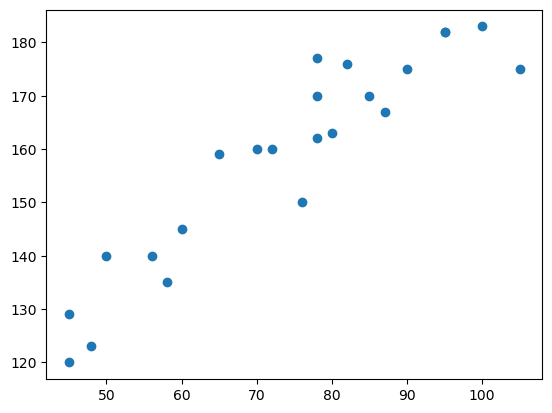

In [56]:
plt.scatter(df['Weight'],df['Height'])

In [57]:
## divide the dataset into independent and dependent features
X = df[['Weight']]
y = df['Height']

In [58]:
X,y

(    Weight
 0       45
 1       58
 2       48
 3       60
 4       70
 5       78
 6       80
 7       90
 8       95
 9       78
 10      82
 11      95
 12     105
 13     100
 14      85
 15      78
 16      50
 17      65
 18      76
 19      87
 20      45
 21      56
 22      72,
 0     120
 1     135
 2     123
 3     145
 4     160
 5     162
 6     163
 7     175
 8     182
 9     170
 10    176
 11    182
 12    175
 13    183
 14    170
 15    177
 16    140
 17    159
 18    150
 19    167
 20    129
 21    140
 22    160
 Name: Height, dtype: int64)

In [59]:
## train test split
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 42)

In [61]:
X.shape,X_train.shape

((23, 1), (18, 1))

In [62]:
##standarization of independent data
from sklearn.preprocessing import StandardScaler

In [63]:
scaler  = StandardScaler()

In [64]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

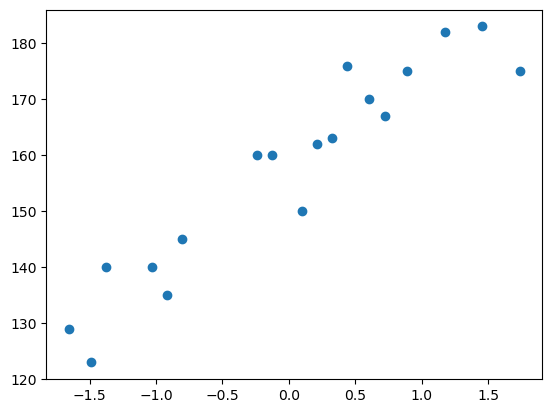

In [66]:
plt.scatter(X_train,y_train)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
regressor = LinearRegression() 

In [69]:
regressor.fit(X_train,y_train)   # it creates the best fit line

LinearRegression()

In [70]:
print("The coefficient or slope is ",regressor.coef_)
print("The intercept is: ",regressor.intercept_)

The coefficient or slope is  [17.03440872]
The intercept is:  157.5


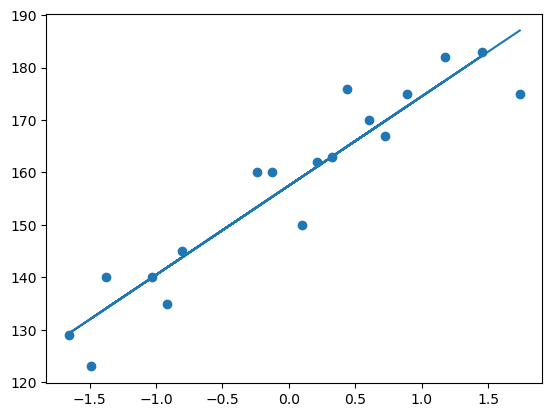

In [71]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

In [72]:
y_pred_test = regressor.predict(X_test)

In [73]:
y_train,y_pred_train

(12    175
 1     135
 13    183
 5     162
 2     123
 11    182
 20    129
 3     145
 4     160
 18    150
 16    140
 21    140
 22    160
 7     175
 10    176
 14    170
 19    167
 6     163
 Name: Height, dtype: int64,
 array([187.0869102 , 141.82375282, 182.27168069, 161.08467086,
        132.19329381, 177.45645118, 129.3041561 , 143.74984463,
        153.38030364, 159.15857905, 134.11938561, 139.89766102,
        155.30639545, 172.64122168, 164.93685446, 167.82599217,
        169.75208397, 163.01076266]))

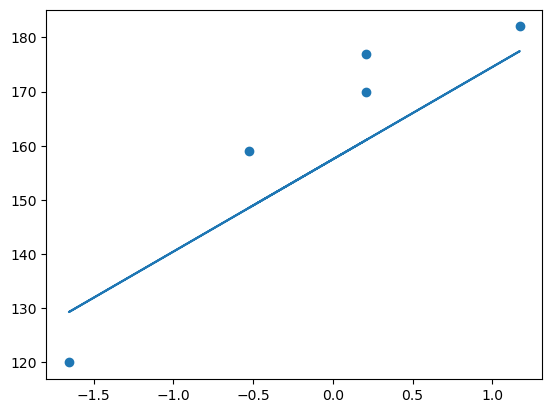

In [74]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test))

In [75]:
##performance metrics

## MSE, MAE, RMSE
# R squared, Adjusted R squared

In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [77]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R squared

In [80]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test) ## R squared

In [81]:
score

0.776986986042344

## Adjusted R squared

In [82]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [84]:
scaled_weight = scaler.transform([[80]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [85]:
scaled_weight

array([[0.32350772]])

In [87]:
print("The predicted value 80 weight is: ",regressor.predict(scaled_weight))

The predicted value 80 weight is:  [163.01076266]


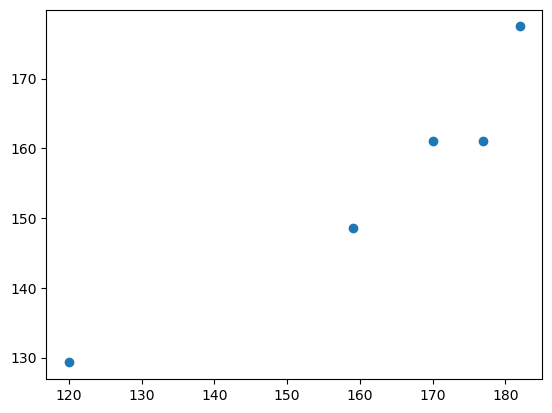

In [93]:
plt.scatter(y_test,y_pred_test)

In [94]:
residuals = y_test-y_pred_test


/tmp/ipykernel_110/509491387.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde = 'True')


<AxesSubplot: xlabel='Height', ylabel='Density'>

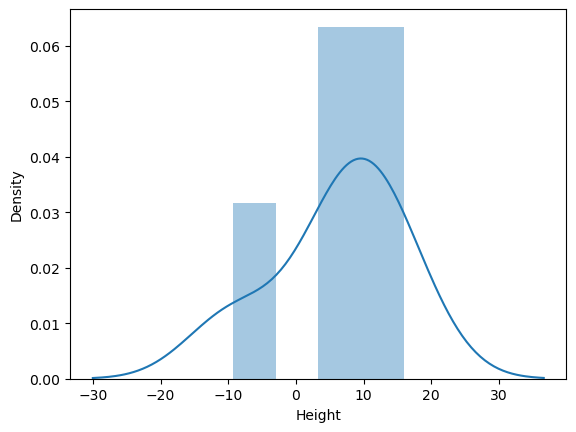

In [99]:
import seaborn as sns
sns.distplot(residuals,kde = 'True')

## scatter plot between the residuals and y_test should be uniform distribution


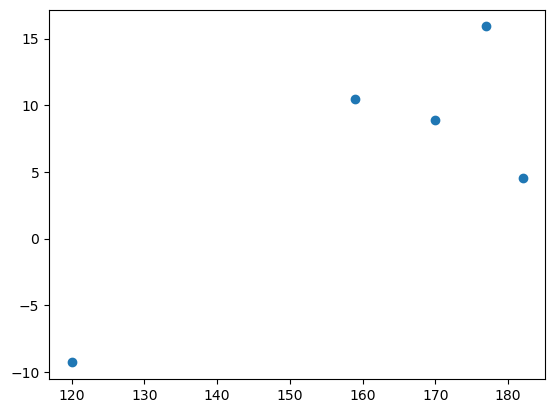

In [101]:
plt.scatter(y_test,residuals)
